In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [153]:
df=pd.read_csv("dataset_falcon9.csv")

In [154]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [156]:
df.tail(2)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
88,89,2020-10-24,Falcon 9,15400.0,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1
89,90,2020-11-05,Falcon 9,3681.0,MEO,CCAFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,0,B1062,-80.577366,28.561857,1


In [157]:
df[5:8]

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
5,6,2014-01-06,Falcon 9,3325.0,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,0
6,7,2014-04-18,Falcon 9,2296.0,ISS,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1006,-80.577366,28.561857,1
7,8,2014-07-14,Falcon 9,1316.0,LEO,CCAFS SLC 40,True Ocean,1,False,False,True,NaN,1.0,0,B1007,-80.577366,28.561857,1


In [158]:
df[["FlightNumber","LaunchSite"]]

,FlightNumber,LaunchSite
0,1,CCAFS SLC 40
1,2,CCAFS SLC 40
2,3,CCAFS SLC 40
3,4,VAFB SLC 4E
4,5,CCAFS SLC 40
...,...,...
85,86,KSC LC 39A
86,87,KSC LC 39A
87,88,KSC LC 39A
88,89,CCAFS SLC 40


In [159]:
df.shape

(90, 18)

In [160]:
df["Date"]

0     2010-06-04
1     2012-05-22
2     2013-03-01
3     2013-09-29
4     2013-12-03
         ...    
85    2020-09-03
86    2020-10-06
87    2020-10-18
88    2020-10-24
89    2020-11-05
Name: Date, Length: 90, dtype: object

In [161]:
df["BoosterVersion"]

0     Falcon 9
1     Falcon 9
2     Falcon 9
3     Falcon 9
4     Falcon 9
        ...   
85    Falcon 9
86    Falcon 9
87    Falcon 9
88    Falcon 9
89    Falcon 9
Name: BoosterVersion, Length: 90, dtype: object

In [162]:
set(df["BoosterVersion"])

{'Falcon 9'}

In [163]:
df["PayloadMass"]

0      6104.959412
1       525.000000
2       677.000000
3       500.000000
4      3170.000000
          ...     
85    15400.000000
86    15400.000000
87    15400.000000
88    15400.000000
89     3681.000000
Name: PayloadMass, Length: 90, dtype: float64

In [164]:
df["PayloadMass"].describe()

count       90.000000
mean      6104.959412
std       4694.671720
min        350.000000
25%       2510.750000
50%       4701.500000
75%       8912.750000
max      15600.000000
Name: PayloadMass, dtype: float64

In [165]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6104.959412,1.788889,3.500000,1.655556,-86.366477,29.449963,0.666667
std,26.124701,4694.671720,1.213172,1.595288,1.710254,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,3.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,5.000000,-80.577366,34.632093,1.000000


array([[<AxesSubplot:title={'center':'FlightNumber'}>,
        <AxesSubplot:title={'center':'PayloadMass'}>,
        <AxesSubplot:title={'center':'Flights'}>],
       [<AxesSubplot:title={'center':'Block'}>,
        <AxesSubplot:title={'center':'ReusedCount'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>]],
      dtype=object)

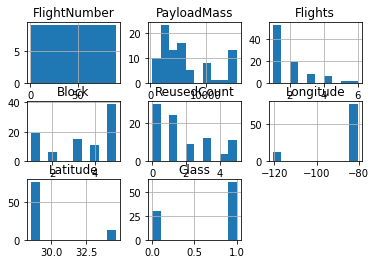

In [166]:
df.hist()

<AxesSubplot:>

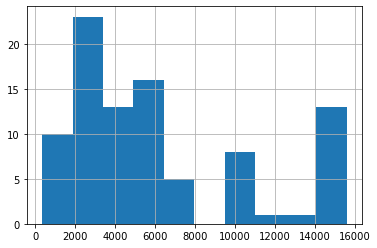

In [167]:
df['PayloadMass'].hist()

<AxesSubplot:>

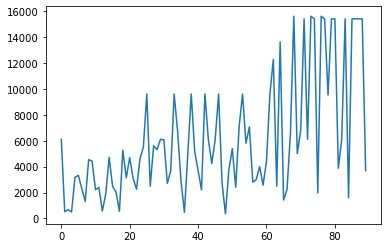

In [168]:
df["PayloadMass"].plot()

In [169]:
df["Orbit"]

0      LEO
1      LEO
2      ISS
3       PO
4      GTO
      ... 
85    VLEO
86    VLEO
87    VLEO
88    VLEO
89     MEO
Name: Orbit, Length: 90, dtype: object

In [170]:
set(df["Orbit"])

{'ES-L1', 'GEO', 'GTO', 'HEO', 'ISS', 'LEO', 'MEO', 'PO', 'SO', 'SSO', 'VLEO'}

In [171]:
len(set(df["Orbit"]))

11

In [172]:
df["Orbit"].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

<AxesSubplot:>

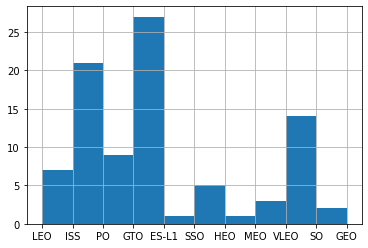

In [173]:
df["Orbit"].hist()

In [174]:
df[["LandingPad", "Orbit"]]

,LandingPad,Orbit
0,NaN,LEO
1,NaN,LEO
2,NaN,ISS
3,NaN,PO
4,NaN,GTO
...,...,...
85,5e9e3032383ecb6bb234e7ca,VLEO
86,5e9e3032383ecb6bb234e7ca,VLEO
87,5e9e3032383ecb6bb234e7ca,VLEO
88,5e9e3033383ecbb9e534e7cc,VLEO


In [175]:
df_success=df[df["Class"]==1]

df_fail=df[df["Class"]!=1]


In [176]:
df_success.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 6 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    60 non-null     int64  
 1   Date            60 non-null     object 
 2   BoosterVersion  60 non-null     object 
 3   PayloadMass     60 non-null     float64
 4   Orbit           60 non-null     object 
 5   LaunchSite      60 non-null     object 
 6   Outcome         60 non-null     object 
 7   Flights         60 non-null     int64  
 8   GridFins        60 non-null     bool   
 9   Reused          60 non-null     bool   
 10  Legs            60 non-null     bool   
 11  LandingPad      55 non-null     object 
 12  Block           60 non-null     float64
 13  ReusedCount     60 non-null     int64  
 14  Serial          60 non-null     object 
 15  Longitude       60 non-null     float64
 16  Latitude        60 non-null     float64
 17  Class           60 non-null     int64

In [177]:
df_success["Orbit"].value_counts()

GTO      14
ISS      13
VLEO     12
PO        6
LEO       5
SSO       5
MEO       2
ES-L1     1
HEO       1
GEO       1
Name: Orbit, dtype: int64

In [178]:
df_fail["Orbit"].value_counts()

GTO     13
ISS      8
PO       3
LEO      2
VLEO     2
MEO      1
SO       1
Name: Orbit, dtype: int64

In [179]:
df["LaunchSite"].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [180]:
df["Outcome"].value_counts()

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [181]:
df_success["Outcome"].value_counts()

True ASDS     41
True RTLS     14
True Ocean     5
Name: Outcome, dtype: int64

In [182]:
df_fail["Outcome"].value_counts()

None None      19
False ASDS      6
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

<AxesSubplot:>

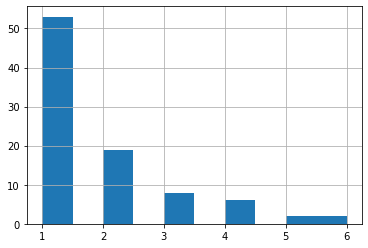

In [183]:
df["Flights"].hist()

In [184]:
df['GridFins'].value_counts()

True     70
False    20
Name: GridFins, dtype: int64

In [185]:
df['Reused'].value_counts()

False    53
True     37
Name: Reused, dtype: int64

In [186]:
df_success['Reused'].value_counts()

False    31
True     29
Name: Reused, dtype: int64

In [187]:
df['Legs'].value_counts()

True     71
False    19
Name: Legs, dtype: int64

In [188]:
df['LandingPad'].value_counts()

5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: LandingPad, dtype: int64

In [189]:
df['Block'].value_counts()

5.0    39
1.0    19
3.0    15
4.0    11
2.0     6
Name: Block, dtype: int64

In [190]:
df['ReusedCount'].value_counts()

0    30
1    24
3    12
5    11
2     9
4     4
Name: ReusedCount, dtype: int64

In [191]:
df['ReusedCount'].value_counts().head()

0    30
1    24
3    12
5    11
2     9
Name: ReusedCount, dtype: int64

In [192]:
df['Longitude'].value_counts()

-80.577366     55
-80.603956     22
-120.610829    13
Name: Longitude, dtype: int64

In [193]:
df['Latitude'].value_counts()

28.561857    55
28.608058    22
34.632093    13
Name: Latitude, dtype: int64

In [194]:
df['LaunchSite'].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [195]:
df=df.drop(['FlightNumber','Date',"BoosterVersion","Longitude","Latitude"], axis=1)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PayloadMass  90 non-null     float64
 1   Orbit        90 non-null     object 
 2   LaunchSite   90 non-null     object 
 3   Outcome      90 non-null     object 
 4   Flights      90 non-null     int64  
 5   GridFins     90 non-null     bool   
 6   Reused       90 non-null     bool   
 7   Legs         90 non-null     bool   
 8   LandingPad   64 non-null     object 
 9   Block        90 non-null     float64
 10  ReusedCount  90 non-null     int64  
 11  Serial       90 non-null     object 
 12  Class        90 non-null     int64  
dtypes: bool(3), float64(2), int64(3), object(5)
memory usage: 7.4+ KB


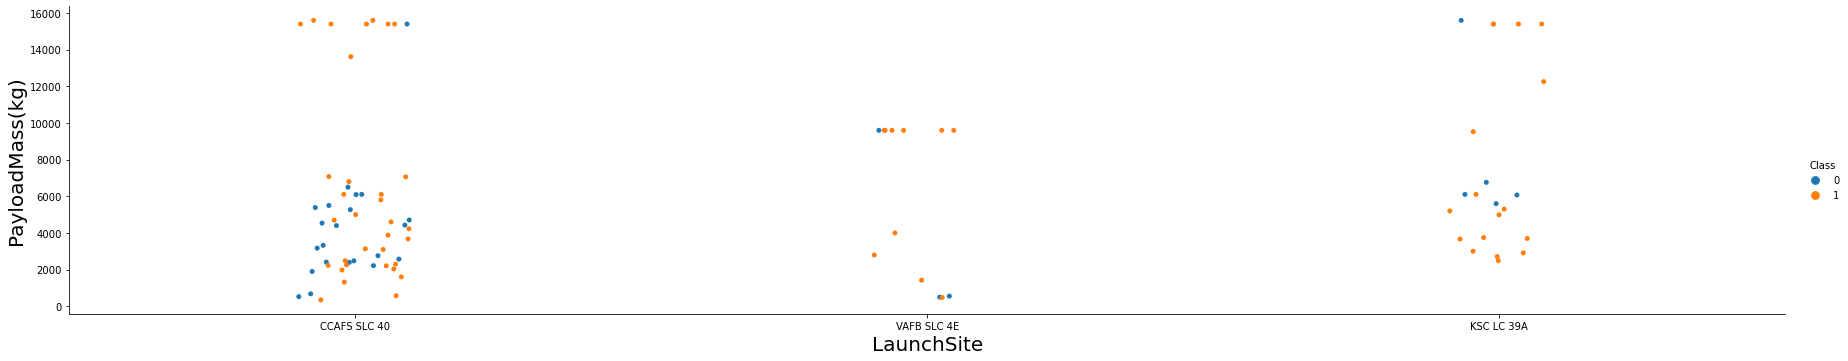

In [197]:
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect=5)
plt.xlabel("LaunchSite", fontsize=20)
plt.ylabel("PayloadMass(kg)", fontsize=20)
plt.show()

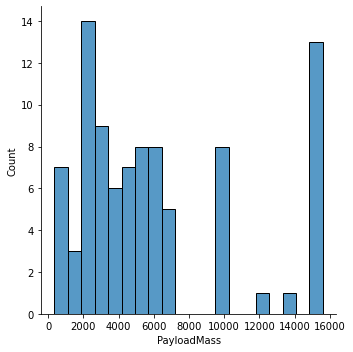

In [198]:
sns.displot(df["PayloadMass"], bins=20)

<AxesSubplot:xlabel='LaunchSite', ylabel='count'>

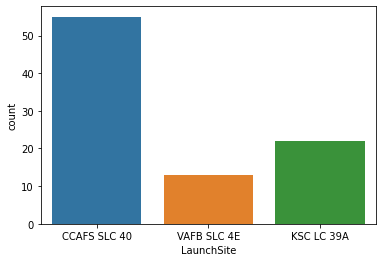

In [199]:
sns.countplot(x="LaunchSite", data=df)

In [200]:
#payload_mean=df["PayloadMass"].mean()
#df["PayloadMass"]=df["PayloadMass"].replace(np.nan, payload_mean)
#df['LaunchSite']=df['LaunchSite'].replace(np.nan, 'CCAFS SLC 40')


In [201]:
dummy_1=pd.get_dummies(df["LandingPad"])
dummy_1[10:15]

,5e9e3032383ecb267a34e7c7,5e9e3032383ecb554034e7c9,5e9e3032383ecb6bb234e7ca,5e9e3032383ecb761634e7cb,5e9e3033383ecbb9e534e7cc
10,0,0,0,0,0
11,0,0,0,1,0
12,0,0,0,0,0
13,0,0,0,1,0
14,0,0,0,0,0


In [202]:
df.columns

Index(['PayloadMass', 'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins',
       'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial',
       'Class'],
      dtype='object')

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PayloadMass  90 non-null     float64
 1   Orbit        90 non-null     object 
 2   LaunchSite   90 non-null     object 
 3   Outcome      90 non-null     object 
 4   Flights      90 non-null     int64  
 5   GridFins     90 non-null     bool   
 6   Reused       90 non-null     bool   
 7   Legs         90 non-null     bool   
 8   LandingPad   64 non-null     object 
 9   Block        90 non-null     float64
 10  ReusedCount  90 non-null     int64  
 11  Serial       90 non-null     object 
 12  Class        90 non-null     int64  
dtypes: bool(3), float64(2), int64(3), object(5)
memory usage: 7.4+ KB


In [204]:
df_dummy = pd.get_dummies(df[["Orbit","LaunchSite","Outcome","LandingPad", "Serial"]])

In [205]:
df_dummy

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
88,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [206]:
df["GridFins"]=df["GridFins"].astype(int)
df["Reused"]=df["Reused"].astype(int)
df["Legs"]=df["Legs"].astype(int)

In [207]:
df=df.drop(["Orbit", "LaunchSite", "Outcome", "LandingPad", "Serial"], axis=1)

In [208]:
df=pd.concat([df, df_dummy], axis=1)

In [209]:
s

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6104.959412,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,525.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,677.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,500.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3170.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15400.000000,2,1,1,1,5.0,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0
86,15400.000000,3,1,1,1,5.0,2,1,0,0,...,0,0,0,0,0,0,1,0,0,0
87,15400.000000,6,1,1,1,5.0,5,1,0,0,...,0,0,0,1,0,0,0,0,0,0
88,15400.000000,3,1,1,1,5.0,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [210]:
#df.to_csv('preprocessed_dataset.csv')
#df.to_csv('C:\dataroadmap\Monogram2\week-5/out.csv')

In [211]:
#df.isnull()

df.isnull().sum()

PayloadMass     0
Flights         0
GridFins        0
Reused          0
Legs            0
               ..
Serial_B1056    0
Serial_B1058    0
Serial_B1059    0
Serial_B1060    0
Serial_B1062    0
Length: 88, dtype: int64

In [212]:
X=df.drop("Class", axis=1)
y=df["Class"]

In [213]:
#X=df.drop("Class", axis=1)
#y=df["Class"]
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=101)

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=101)

In [215]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [216]:
predictions = logmodel.predict(X_test)

In [217]:
predictions

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [218]:
y_test

50    0
6     1
51    0
54    1
53    1
69    1
32    1
31    1
21    1
88    1
43    1
47    0
3     0
1     0
74    0
16    1
45    0
25    1
Name: Class, dtype: int64

In [219]:
confusion_matrix(y_test, predictions)

array([[ 7,  0],
       [ 1, 10]], dtype=int64)

In [220]:
accuracy_score(y_test, predictions, normalize=False)

17

In [221]:
accuracy_score(y_test, predictions, normalize=True)

0.9444444444444444

In [222]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.91      0.95        11

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



In [223]:
knn=KNeighborsClassifier(n_neighbors=10)

In [224]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [225]:
predictions = knn.predict(X_test)

In [226]:
predictions

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [227]:
y_test

50    0
6     1
51    0
54    1
53    1
69    1
32    1
31    1
21    1
88    1
43    1
47    0
3     0
1     0
74    0
16    1
45    0
25    1
Name: Class, dtype: int64

In [228]:
confusion_matrix(y_test, predictions)

array([[2, 5],
       [3, 8]], dtype=int64)

In [229]:
accuracy_score(y_test, predictions, normalize=False)

10

In [230]:
accuracy_score(y_test, predictions, normalize=True)

0.5555555555555556

In [231]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.62      0.73      0.67        11

    accuracy                           0.56        18
   macro avg       0.51      0.51      0.50        18
weighted avg       0.53      0.56      0.54        18



In [232]:
knn_1=KNeighborsClassifier()

In [233]:
parameters = {"n_neighbors":[1,2,3,4,5,6,7,8,9,10]}

In [234]:
knn_cv = GridSearchCV(knn_1, parameters)
knn_cv.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [235]:
print("best parameters:", knn_cv.best_params_)

best parameters: {'n_neighbors': 9}


In [236]:
knn_1=KNeighborsClassifier(n_neighbors=9)
knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [237]:
prediction_1=knn_1.predict(X_test)

In [238]:
confusion_matrix(y_test,prediction_1 )

array([[2, 5],
       [2, 9]], dtype=int64)

In [239]:
accuracy_score(y_test, prediction_1, normalize=False)

11

In [240]:
accuracy_score(y_test, prediction_1, normalize=True)

0.6111111111111112

In [241]:
X=df.drop("Class", axis=1)
y=df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=101)

In [242]:
tree = DecisionTreeClassifier()

In [243]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [244]:
predictions = tree.predict(X_test)

In [245]:
predictions

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [246]:
y_test

50    0
6     1
51    0
54    1
53    1
69    1
32    1
31    1
21    1
88    1
43    1
47    0
3     0
1     0
74    0
16    1
45    0
25    1
Name: Class, dtype: int64

In [247]:
confusion_matrix(y_test, predictions)

array([[ 7,  0],
       [ 0, 11]], dtype=int64)

In [248]:
accuracy_score(y_test, predictions, normalize=False)

18

In [249]:
accuracy_score(y_test, predictions, normalize=True)

1.0

In [250]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        11

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [251]:
tree_1 = DecisionTreeClassifier()

In [252]:
parameters = {"min_samples_leaf":[1,2,4], "min_samples_split": [2,5]}

In [253]:
tree_cv = GridSearchCV(tree_1, parameters)
tree_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5]})

In [254]:
print("best parameters:", tree_cv.best_params_)

best parameters: {'min_samples_leaf': 4, 'min_samples_split': 2}


In [255]:
tree_1 = DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=5 )

In [256]:
tree_1.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=5)

In [257]:
prediction_1=tree_1.predict(X_test)

In [258]:
prediction_1

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [259]:
y_test

50    0
6     1
51    0
54    1
53    1
69    1
32    1
31    1
21    1
88    1
43    1
47    0
3     0
1     0
74    0
16    1
45    0
25    1
Name: Class, dtype: int64

In [260]:
confusion_matrix(y_test, prediction_1)

array([[7, 0],
       [2, 9]], dtype=int64)

In [261]:
accuracy_score(y_test, prediction_1, normalize=False)

16

In [262]:
accuracy_score(y_test, prediction_1, normalize=True)

0.8888888888888888

In [263]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        11

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [264]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [265]:
rfc_pred = rfc.predict(X_test)

In [266]:
rfc_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [267]:
y_test

50    0
6     1
51    0
54    1
53    1
69    1
32    1
31    1
21    1
88    1
43    1
47    0
3     0
1     0
74    0
16    1
45    0
25    1
Name: Class, dtype: int64

In [268]:
confusion_matrix(y_test, rfc_pred)

array([[ 5,  2],
       [ 1, 10]], dtype=int64)

In [269]:
accuracy_score(y_test, rfc_pred, normalize=False)

15

In [270]:
accuracy_score(y_test, rfc_pred, normalize=True)

0.8333333333333334

In [271]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.83      0.91      0.87        11

    accuracy                           0.83        18
   macro avg       0.83      0.81      0.82        18
weighted avg       0.83      0.83      0.83        18



In [272]:
rfc_1 = RandomForestClassifier()


In [273]:
parameters = {"min_samples_leaf":[1,2,4], "min_samples_split":[2,5,10], "n_estimators":[10,20,30]}
rfc_cv=GridSearchCV(rfc_1, parameters)
rfc_cv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30]})

In [274]:
print("best parameters:", rfc_cv.best_params_)

best parameters: {'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 10}


In [275]:
rfc_1 = RandomForestClassifier(min_samples_leaf=1, min_samples_split=2, n_estimators=20 )

In [276]:
rfc_1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [277]:
rfc_pred_1= rfc_1.predict(X_test)

In [278]:
rfc_pred_1

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [279]:
y_test

50    0
6     1
51    0
54    1
53    1
69    1
32    1
31    1
21    1
88    1
43    1
47    0
3     0
1     0
74    0
16    1
45    0
25    1
Name: Class, dtype: int64

In [280]:
confusion_matrix(y_test, rfc_pred_1)

array([[5, 2],
       [2, 9]], dtype=int64)

In [281]:
accuracy_score(y_test,rfc_pred_1, normalize=False)

14

In [282]:
accuracy_score(y_test,rfc_pred_1, normalize=True)

0.7777777777777778

In [283]:
print(classification_report(y_test,rfc_pred_1))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.82      0.82      0.82        11

    accuracy                           0.78        18
   macro avg       0.77      0.77      0.77        18
weighted avg       0.78      0.78      0.78        18



In [284]:
svm=SVC()

In [285]:
svm.fit(X_train, y_train)

SVC()

In [286]:
predictions = svm.predict(X_test)

In [287]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [288]:
y_test

50    0
6     1
51    0
54    1
53    1
69    1
32    1
31    1
21    1
88    1
43    1
47    0
3     0
1     0
74    0
16    1
45    0
25    1
Name: Class, dtype: int64

In [289]:
confusion_matrix(y_test, predictions)

array([[ 0,  7],
       [ 0, 11]], dtype=int64)

In [290]:
accuracy_score(y_test, predictions, normalize=False)

11

In [291]:
accuracy_score(y_test, predictions, normalize=True)

0.6111111111111112

In [292]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.61      1.00      0.76        11

    accuracy                           0.61        18
   macro avg       0.31      0.50      0.38        18
weighted avg       0.37      0.61      0.46        18



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [293]:
svm_1=SVC()

In [294]:
parameters = {"C":[0.5, 1, 1.5], "kernel":['linear', 'rbf', 'sigmoid']}

In [297]:
svm_cv = GridSearchCV(svm_1, parameters)
svm_cv.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 1, 1.5],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [299]:
print("best parametrs:", svm_cv.best_params_)

best parametrs: {'C': 0.5, 'kernel': 'linear'}


In [300]:
svm_1=SVC(C = 0.5, kernel = "linear")

In [301]:
svm_1.fit(X_train, y_train)

SVC(C=0.5, kernel='linear')

In [302]:
prediction_1=svm_1.predict(X_test)

In [304]:
prediction_1

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [303]:
y_test

50    0
6     1
51    0
54    1
53    1
69    1
32    1
31    1
21    1
88    1
43    1
47    0
3     0
1     0
74    0
16    1
45    0
25    1
Name: Class, dtype: int64

In [305]:
confusion_matrix(y_test, prediction_1)

array([[ 5,  2],
       [ 1, 10]], dtype=int64)

In [307]:
accuracy_score(y_test, prediction_1, normalize=False)

15

In [308]:
accuracy_score(y_test, prediction_1, normalize=True)

0.8333333333333334

In [309]:
print(classification_report(y_test, prediction_1))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.83      0.91      0.87        11

    accuracy                           0.83        18
   macro avg       0.83      0.81      0.82        18
weighted avg       0.83      0.83      0.83        18



In [310]:
svm_cv = GridSearchCV(svm_1, parameters, cv=4, verbose=3 )
svm_cv.fit(X_train, y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits
[CV 1/4] END ..............C=0.5, kernel=linear;, score=0.889 total time=   8.8s
[CV 2/4] END ..............C=0.5, kernel=linear;, score=0.833 total time=  12.0s
[CV 3/4] END ..............C=0.5, kernel=linear;, score=0.778 total time=  11.7s
[CV 4/4] END ..............C=0.5, kernel=linear;, score=1.000 total time=   6.0s
[CV 1/4] END .................C=0.5, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/4] END .................C=0.5, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/4] END .................C=0.5, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/4] END .................C=0.5, kernel=rbf;, score=0.722 total time=   0.0s
[CV 1/4] END .............C=0.5, kernel=sigmoid;, score=0.556 total time=   0.0s
[CV 2/4] END .............C=0.5, kernel=sigmoid;, score=0.444 total time=   0.0s
[CV 3/4] END .............C=0.5, kernel=sigmoid;, score=0.611 total time=   0.0s
[CV 4/4] END .............C=0.5, kernel=sigmoid;,

GridSearchCV(cv=4, estimator=SVC(C=0.5, kernel='linear'),
             param_grid={'C': [0.5, 1, 1.5],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             verbose=3)